### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Logistic Regression Imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Analysis Imports
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Naive Bayes Imports
from sklearn.naive_bayes import GaussianNB

# K-Nearest Neighbours Imports
from sklearn.neighbors import KNeighborsClassifier

# Decision Tree Imports
from sklearn.tree import DecisionTreeClassifier

# Random Forest Imports
from sklearn.ensemble import RandomForestClassifier

# Support Vector Machine Imports
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Neural Network Imports
from sklearn.neural_network import MLPClassifier

### Data Processing

In [2]:
df = pd.read_csv('./csgo_round_snapshots.csv')

# Target variable
ct_win = df['round_winner']

# Transform target to boolean 'ct_win'
ct_win = ct_win.map({'CT': True, 'T': False})

# Features
features = df.drop(['round_winner'], axis=1)

# Dropping irrelevant features
features = features.drop(['map'], axis=1)

# Mapping bomb_planted from boolean to integer
features['bomb_planted'] = features['bomb_planted'].astype(int) * 2 - 1

### Logistic Regression

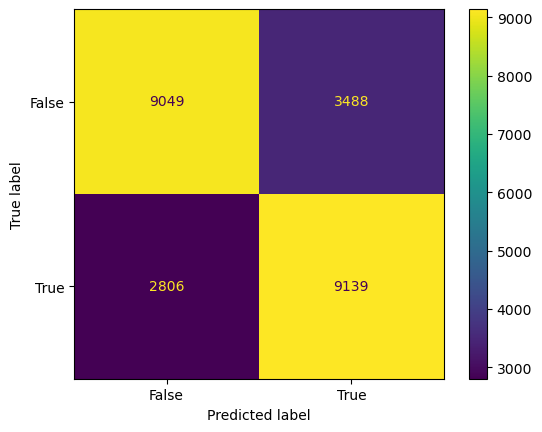

In [3]:
# Logistic Regression Model on data
X_train, X_test, y_train, y_test = train_test_split(features, ct_win, test_size=0.2, random_state=0)

clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()

In [4]:
# Accuracy of model
print("Accuracy:", clf.score(X_test, y_test))
logistic_regression_accuracy = clf.score(X_test, y_test)

Accuracy: 0.7429131606894862


### Naive Bayes

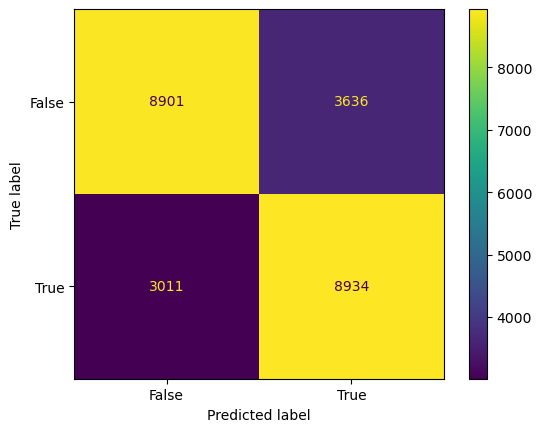

In [5]:
# Naive Bayes Model on data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()

In [6]:
# Accuracy of model
print("Accuracy:", gnb.score(X_test, y_test))
naive_bayes_accuracy = gnb.score(X_test, y_test)

Accuracy: 0.7284944040519565


### K-Nearest Neighbours

/home/rgavigan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


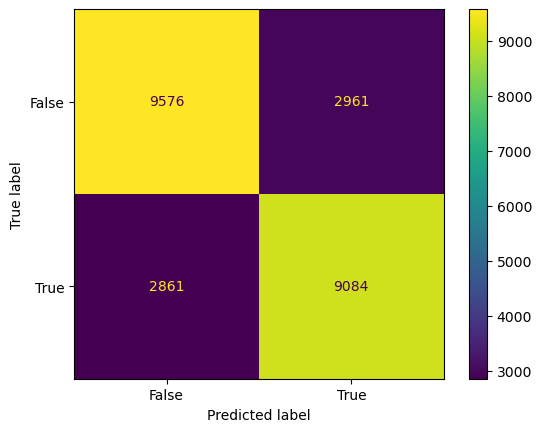

In [7]:
# K-Nearest Neighbours Model on data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test.values)

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()


In [8]:
# Accuracy of model
print("Accuracy:", accuracy_score(y_test, y_pred))
knn_accuracy = accuracy_score(y_test, y_pred)

Accuracy: 0.7621926313209705


### Decision Trees

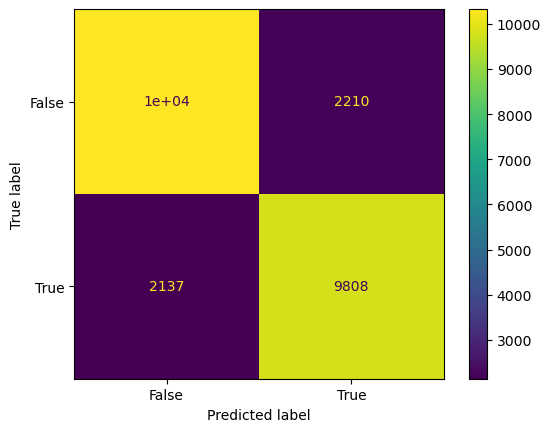

In [9]:
# Decision Tree Model on data
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()

In [10]:
# Accuracy of model
print("Accuracy:", dt.score(X_test, y_test))
decision_tree_accuracy = dt.score(X_test, y_test)

Accuracy: 0.8224409770443591


### Support Vector Machines

In [11]:
# Support Vector Machine Model on data
# sc = StandardScaler()
# X_train_svm = sc.fit_transform(X_train)
# X_test_svm = sc.transform(X_test)
# svm = SVC(random_state=0)
# svm.fit(X_train_svm, y_train)

# y_pred = svm.predict(X_test_svm)

# cm = confusion_matrix(y_test, y_pred)

# # Visualize confusion matrix
# cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
# cm_display.plot()

In [12]:
# Accuracy of model
# svm_accuracy = svm.score(X_test, y_test)
# print("Accuracy of model:", svm_accuracy)

### Neural Networks

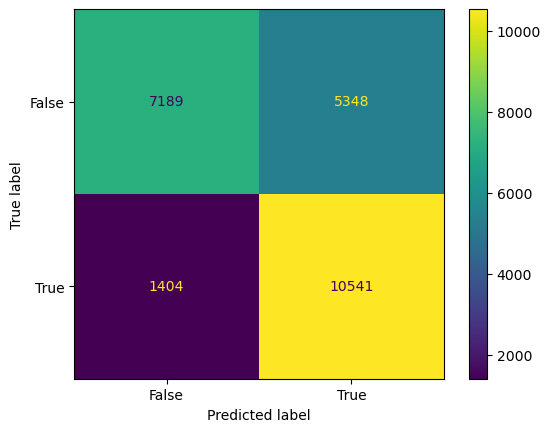

In [13]:
# Neural Network Model on data
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
nn.fit(X_train, y_train)

y_pred = nn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
cm_display.plot()

In [14]:
# Accuracy of model
print("Accuracy:", accuracy_score(y_test, y_pred))
nn_accuracy = accuracy_score(y_test, y_pred)

Accuracy: 0.724205538763173


### Result Analysis

In [15]:
# LaTeX Table Comparing Accuracy of Models
print("\\begin{table}")
print("\\caption{Accuracy of each model on all maps}")
print("\\centering")
print("\\begin{tabular}{|c|c|c|}")
print("\\hline")
print("Model & Accuracy \\\\ \\hline")
print(f"Decision Tree & {decision_tree_accuracy:.3f} \\\\ \\hline")
print(f"K-Nearest Neighbours & {knn_accuracy:.3f} \\\\ \\hline")
print(f"Logistic Regression & {logistic_regression_accuracy:.3f} \\\\ \\hline")
print(f"Naive Bayes & {naive_bayes_accuracy:.3f} \\\\ \\hline")
print(f"Neural Network & {nn_accuracy:.3f} \\\\ \\hline")
#print(f"Support Vector Machine & {svm_accuracy:.3f} \\\\ \\hline")
print("\\end{tabular}")
print("\\end{table}")

\begin{table}
\caption{Accuracy of each model on all maps}
\centering
\begin{tabular}{|c|c|c|}
\hline
Model & Accuracy \\ \hline
Decision Tree & 0.822 \\ \hline
K-Nearest Neighbours & 0.762 \\ \hline
Logistic Regression & 0.743 \\ \hline
Naive Bayes & 0.728 \\ \hline
Neural Network & 0.724 \\ \hline
\end{tabular}
\end{table}


### Map-Based Decision Tree

In [16]:
# Load data
df = pd.read_csv('./csgo_round_snapshots.csv')

# Target variable
ct_win = df['round_winner']

# Transform target to boolean 'ct_win'
ct_win = ct_win.map({'CT': True, 'T': False})

# Features
features = df.drop(['round_winner'], axis=1)

In [17]:
accuracy_map = {}
# Splitting data based on map and running decision tree for each map
for map in features['map'].unique():
    print(f"Map: {map}")
    map_features = features[features['map'] == map]
    map_ct_win = ct_win[features['map'] == map]

    # Dropping irrelevant features
    map_features = map_features.drop(['map'], axis=1)

    # Mapping bomb_planted from boolean to integer
    map_features['bomb_planted'] = map_features['bomb_planted'].astype(int) * 2 - 1

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(map_features, map_ct_win, test_size=0.2, random_state=0)

    # Decision Tree Model on data
    dt = DecisionTreeClassifier()
    dt.fit(X_train, y_train)

    y_pred = dt.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    # Visualize confusion matrix
    # cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    # cm_display.plot()

    # Accuracy of model
    print("Accuracy:", dt.score(X_test, y_test))

    # Add to accuracy map
    accuracy_map[map] = dt.score(X_test, y_test)

    print()

Map: de_dust2
Accuracy: 0.8446601941747572

Map: de_mirage
Accuracy: 0.8210441334768568

Map: de_nuke
Accuracy: 0.8294349540078844

Map: de_inferno
Accuracy: 0.839806844425782

Map: de_overpass
Accuracy: 0.820021299254526

Map: de_vertigo
Accuracy: 0.8325852782764811

Map: de_train
Accuracy: 0.8154872174879585

Map: de_cache
Accuracy: 0.896551724137931



In [18]:
# Sort accuracy map
accuracy_map = dict(sorted(accuracy_map.items(), key=lambda item: item[1], reverse=True))

# LaTeX table of accuracy of each map
print("\\begin{table}")
print("\\caption{Map-based accuracy of Decision Tree model}")
print("\\centering")
print("\\begin{tabular}{|c|c|c|}")
print("\\hline")
print("Map & Accuracy \\\\ \\hline")
for map, accuracy in accuracy_map.items():
    print(f"{map} & {accuracy:.3f} \\\\ \\hline")
print("\\end{tabular}")
print("\\end{table}")

# Average map-based accuracy for decision tree
average_accuracy = sum(accuracy_map.values()) / len(accuracy_map)
print(f"Average map-based accuracy: {average_accuracy:.3f}")

\begin{table}
\caption{Map-based accuracy of Decision Tree model}
\centering
\begin{tabular}{|c|c|c|}
\hline
Map & Accuracy \\ \hline
de_cache & 0.897 \\ \hline
de_dust2 & 0.845 \\ \hline
de_inferno & 0.840 \\ \hline
de_vertigo & 0.833 \\ \hline
de_nuke & 0.829 \\ \hline
de_mirage & 0.821 \\ \hline
de_overpass & 0.820 \\ \hline
de_train & 0.815 \\ \hline
\end{tabular}
\end{table}
Average map-based accuracy: 0.837


### Map-Based Logistic Regression

In [19]:
# Map-based logistic regression
accuracy_map = {}

# Splitting data based on map and running logistic regression for each map
for map in features['map'].unique():
    print(f"Map: {map}")
    map_features = features[features['map'] == map]
    map_ct_win = ct_win[features['map'] == map]

    # Dropping irrelevant features
    map_features = map_features.drop(['map'], axis=1)

    # Mapping bomb_planted from boolean to integer
    map_features['bomb_planted'] = map_features['bomb_planted'].astype(int) * 2 - 1

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(map_features, map_ct_win, test_size=0.2, random_state=0)

    # Logistic Regression Model on data
    clf = LogisticRegression(random_state=0, max_iter=10000).fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    # Visualize confusion matrix
    # cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    # cm_display.plot()

    # Accuracy of model
    print("Accuracy:", clf.score(X_test, y_test))

    # Add to accuracy map
    accuracy_map[map] = clf.score(X_test, y_test)

Map: de_dust2
Accuracy: 0.7324452472341386
Map: de_mirage
Accuracy: 0.7416576964477933
Map: de_nuke
Accuracy: 0.7324572930354797
Map: de_inferno
Accuracy: 0.7425992021834978
Map: de_overpass
Accuracy: 0.7625133120340788
Map: de_vertigo
Accuracy: 0.7684021543985637
Map: de_train
Accuracy: 0.7469433123379029
Map: de_cache
Accuracy: 0.8620689655172413


In [20]:
# Average map-based accuracy for logistic regression
avg_accuracy_logistic_regression = sum(accuracy_map.values()) / len(accuracy_map)
print(f"Average accuracy: {avg_accuracy_logistic_regression:.3f}")

Average accuracy: 0.761


### Map-Based Naive Bayes

In [21]:
# Map-based Naive Bayes
accuracy_map = {}

# Splitting data based on map and running Naive Bayes for each map
for map in features['map'].unique():
    print(f"Map: {map}")
    map_features = features[features['map'] == map]
    map_ct_win = ct_win[features['map'] == map]

    # Dropping irrelevant features
    map_features = map_features.drop(['map'], axis=1)

    # Mapping bomb_planted from boolean to integer
    map_features['bomb_planted'] = map_features['bomb_planted'].astype(int) * 2 - 1

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(map_features, map_ct_win, test_size=0.2, random_state=0)

    # Naive Bayes Model on data
    gnb = GaussianNB()
    gnb.fit(X_train, y_train)

    y_pred = gnb.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    # Visualize confusion matrix
    # cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    # cm_display.plot()

    # Accuracy of model
    print("Accuracy:", gnb.score(X_test, y_test))

    # Add to accuracy map
    accuracy_map[map] = gnb.score(X_test, y_test)

Map: de_dust2
Accuracy: 0.7322194626326485
Map: de_mirage
Accuracy: 0.728740581270183
Map: de_nuke
Accuracy: 0.7169513797634691
Map: de_inferno
Accuracy: 0.732311568339282
Map: de_overpass
Accuracy: 0.759318423855165
Map: de_vertigo
Accuracy: 0.7594254937163375
Map: de_train
Accuracy: 0.728047424972212
Map: de_cache
Accuracy: 0.8275862068965517


In [22]:
# Average map-based accuracy for Naive Bayes
average_accuracy_naive_bayes = sum(accuracy_map.values()) / len(accuracy_map)
print(f"Average accuracy: {average_accuracy_naive_bayes:.3f}")

Average accuracy: 0.748


### Map-Based K-Nearest Neighbours

In [23]:
# Map-based K-Nearest Neighbours
accuracy_map = {}

# Splitting data based on map and running K-Nearest Neighbours for each map
for map in features['map'].unique():
    print(f"Map: {map}")
    map_features = features[features['map'] == map]
    map_ct_win = ct_win[features['map'] == map]

    # Dropping irrelevant features
    map_features = map_features.drop(['map'], axis=1)

    # Mapping bomb_planted from boolean to integer
    map_features['bomb_planted'] = map_features['bomb_planted'].astype(int) * 2 - 1

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(map_features, map_ct_win, test_size=0.2, random_state=0)

    # K-Nearest Neighbours Model on data
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test.values)

    cm = confusion_matrix(y_test, y_pred)

    # Visualize confusion matrix
    # cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
    # cm_display.plot()

    # Accuracy of model
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Add to accuracy map
    accuracy_map[map] = accuracy_score(y_test, y_pred)

Map: de_dust2


/home/rgavigan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.7353804470535109
Map: de_mirage
Accuracy: 0.7459634015069968
Map: de_nuke


/home/rgavigan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/rgavigan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.7300919842312746
Map: de_inferno


/home/rgavigan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.7491077052277976
Map: de_overpass
Accuracy: 0.7294994675186368
Map: de_vertigo
Accuracy: 0.7055655296229802
Map: de_train


/home/rgavigan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/rgavigan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/home/rgavigan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Accuracy: 0.7213782882549092
Map: de_cache
Accuracy: 0.7931034482758621


/home/rgavigan/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [24]:
# Average map-based accuracy for K-Nearest Neighbours
average_accuracy_knn = sum(accuracy_map.values()) / len(accuracy_map)
print(f"Average accuracy: {average_accuracy_knn:.3f}")

Average accuracy: 0.739


### Map-Based Neural Networks

In [25]:
# Map-based Neural Network
accuracy_map = {}

# Splitting data based on map and running Neural Network for each map
for map in features['map'].unique():
    print(f"Map: {map}")
    map_features = features[features['map'] == map]
    map_ct_win = ct_win[features['map'] == map]

    # Dropping irrelevant features
    map_features = map_features.drop(['map'], axis=1)

    # Mapping bomb_planted from boolean to integer
    map_features['bomb_planted'] = map_features['bomb_planted'].astype(int) * 2 - 1

    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(map_features, map_ct_win, test_size=0.2, random_state=0)

    # Neural Network Model on data
    nn = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

    y_pred = nn.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)

    # Accuracy of model
    print("Accuracy:", nn.score(X_test, y_test))

    # Add to accuracy map
    accuracy_map[map] = nn.score(X_test, y_test)

Map: de_dust2
Accuracy: 0.6604199593587717
Map: de_mirage
Accuracy: 0.5863832077502691
Map: de_nuke
Accuracy: 0.5758212877792378
Map: de_inferno
Accuracy: 0.6336342641192526
Map: de_overpass
Accuracy: 0.739084132055378
Map: de_vertigo
Accuracy: 0.7504488330341114
Map: de_train
Accuracy: 0.6020748425342719
Map: de_cache
Accuracy: 0.6551724137931034


In [26]:
# Average map-based accuracy for Neural Network
average_accuracy_nn = sum(accuracy_map.values()) / len(accuracy_map)
print(f"Average accuracy: {average_accuracy_nn:.3f}")

Average accuracy: 0.650


In [27]:
# LaTeX Table For All Average Map Accuracy
print("\\begin{table}")
print("\\caption{Averaged map-based accuracy of all models, excluding SVM after poor performance on overall accuracy.}")
print("\\centering")
print("\\begin{tabular}{|c|c|c|c|c|}")
print("\\hline")
print("Model & Accuracy \\\\ \\hline")
print(f"Decision Tree & {average_accuracy:.3f} \\\\ \\hline")
print(f"Logistic Regression & {avg_accuracy_logistic_regression:.3f} \\\\ \\hline")
print(f"Naive Bayes & {average_accuracy_naive_bayes:.3f} \\\\ \\hline")
print(f"K-Nearest Neighbours & {average_accuracy_knn:.3f} \\\\ \\hline")
print(f"Neural Network & {average_accuracy_nn:.3f} \\\\ \\hline")
print("\\end{tabular}")
print("\\end{table}")

\begin{table}
\caption{Map-based accuracy of all models}
\centering
\begin{tabular}{|c|c|c|c|c|}
\hline
Model & Accuracy \\ \hline
Decision Tree & 0.837 \\ \hline
Logistic Regression & 0.761 \\ \hline
Naive Bayes & 0.748 \\ \hline
K-Nearest Neighbours & 0.739 \\ \hline
Neural Network & 0.650 \\ \hline
\end{tabular}
\end{table}
